# Prosper Loan Data Analysis & Visualization
## by Felicia Demulling

## Preliminary Wrangling

> The Prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The loan information is spread throughout the United States.

In [251]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [252]:
df = pd.read_csv('prosperLoanData.csv')

### What is the structure of your dataset?

> There are 81 columns in this dataset. Here are the columns that I will be using the most.
> 
> - ListingKey - Unique key for each listing
> 
> - ListingCreationDate - The date the listing was created
> 
> - Term - Length of the loan expressed in months
> 
> - LoanStatus - Status of the loan - canceled, current, defaulted, etc. 
> 
> - BorrowerRate - Borrower’s annual interest percentage rate
> 
> - Listing Category - what type of loan it is
> 
> - BorrowerState - the state where the listing was created
> 
> - Occupation: The occupation selected by the borrower
> 
> - CreditScoreRangeLower - The lower credit score
> 
> - CreditScoreRangeHigher - The upper credit score
> 
> - DebtToIncomeRatio - Debt to income ratio of borrower
> 
> - IncomeRange - Income of the borrower
> 
> - LoanOriginalAmount - The amount of the loan

### What is/are the main feature(s) of interest in your dataset?

> Beings this dataset is so large, I have endless opportunities to find relationships. Here are the top most interesting things I'd like to explore.
>
> - The average interest rate of most borrowers. 
> - What the highest, lowest and average risk scores are.
> - What the most common loan types are. 
> - Which states have the highest borrowers. 
> - What are the different occupations and how much did they borrow?

> I'm interested in the individuals income range compared to how much they borrowed. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that I'll being using in the dataset the most are: the borrower rate will help me investigate how much each individual was charged for interest rate; the prosper score will allow me to see the average risk scores (based on a  scale of 1 to 10, 10 being the 

# Clean

### Step 1. Delete all unused columns

In [253]:
df.drop(columns=['ListingNumber', 'ListingNumber', 'BorrowerAPR', 'LenderYield',
        'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'], axis=1, inplace=True)

df.drop(columns=['ProsperRating (numeric)', 'ProsperRating (Alpha)', 'EmploymentStatus',
        'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup'], axis=1, inplace=True)

df.drop(columns=['GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines',
        'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts'], axis=1, inplace=True)
        
df.drop(columns=['OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
        'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years'], axis=1, inplace=True)
        
df.drop(columns=['PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
        'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades'], axis=1, inplace=True)
        
df.drop(columns=['TradesOpenedLast6Months', 'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans',
        'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate'], axis=1, inplace=True)
        
df.drop(columns=['ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
        'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace=True)
        
df.drop(columns=['LoanMonthsSinceOrigination', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey',
        'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees'], axis=1, inplace=True)
        
df.drop(columns=['LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
        'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount'], axis=1, inplace=True)
        
df.drop(columns=['InvestmentFromFriendsAmount', 'Investors', 'LoanNumber', 'TradesNeverDelinquent (percentage)'], axis=1, inplace=True)

df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.1580,NaN,0,CO,Other,640.0,659.0,0.17,"$25,000-49,999",3083.333333,9425
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.0920,7.0,2,CO,Professional,680.0,699.0,0.18,"$50,000-74,999",6125.000000,10000
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.2750,NaN,0,GA,Other,480.0,499.0,0.06,Not displayed,2083.333333,3001
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.0974,9.0,16,GA,Skilled Labor,800.0,819.0,0.15,"$25,000-49,999",2875.000000,10000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.2085,4.0,2,MN,Executive,680.0,699.0,0.26,"$100,000+",9583.333333,15000


In [254]:
duplicate_df = df[df.duplicated(subset='ListingKey')]

#### Test

In [255]:
duplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 9 to 113863
Data columns (total 17 columns):
ListingKey                   871 non-null object
ListingCreationDate          871 non-null object
CreditGrade                  0 non-null object
Term                         871 non-null int64
LoanStatus                   871 non-null object
ClosedDate                   13 non-null object
BorrowerRate                 871 non-null float64
ProsperScore                 871 non-null float64
ListingCategory (numeric)    871 non-null int64
BorrowerState                871 non-null object
Occupation                   812 non-null object
CreditScoreRangeLower        871 non-null float64
CreditScoreRangeUpper        871 non-null float64
DebtToIncomeRatio            789 non-null float64
IncomeRange                  871 non-null object
StatedMonthlyIncome          871 non-null float64
LoanOriginalAmount           871 non-null int64
dtypes: float64(6), int64(3), object(8)
memory usage: 122.5

In [256]:
df.drop_duplicates(subset=['ListingKey'], keep='last', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                   113066 non-null object
ListingCreationDate          113066 non-null object
CreditGrade                  28953 non-null object
Term                         113066 non-null int64
LoanStatus                   113066 non-null object
ClosedDate                   55076 non-null object
BorrowerRate                 113066 non-null float64
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    113066 non-null int64
BorrowerState                107551 non-null object
Occupation                   109537 non-null object
CreditScoreRangeLower        112475 non-null float64
CreditScoreRangeUpper        112475 non-null float64
DebtToIncomeRatio            104594 non-null float64
IncomeRange                  113066 non-null object
StatedMonthlyIncome          113066 non-null float64
LoanOriginalAmount           113066 non-null int64
dtype

### Step 2. Replace category numbers with the name

In [257]:
df.replace({'ListingCategory (numeric)': {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement',
                                         3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto',
                                         7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
                                         11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
                                         14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 
                                        17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}}, inplace=True )

#### Test

In [258]:
df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.1580,NaN,Not Available,CO,Other,640.0,659.0,0.17,"$25,000-49,999",3083.333333,9425
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.0920,7.0,Home Improvement,CO,Professional,680.0,699.0,0.18,"$50,000-74,999",6125.000000,10000
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.2750,NaN,Not Available,GA,Other,480.0,499.0,0.06,Not displayed,2083.333333,3001
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.0974,9.0,Motorcycle,GA,Skilled Labor,800.0,819.0,0.15,"$25,000-49,999",2875.000000,10000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.2085,4.0,Home Improvement,MN,Executive,680.0,699.0,0.26,"$100,000+",9583.333333,15000


### Step 3. Remove null values from the 'CreditScoreRangeLower' column.

In [259]:
df_score = df[df.CreditScoreRangeLower != 0]

#### Test

In [260]:
df_score.describe()

,Term,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
count,112933.000000,112933.000000,83982.000000,112342.000000,112342.000000,104522.000000,1.129330e+05,112933.000000
mean,40.805823,0.192907,5.954502,686.336544,705.336544,0.276162,5.608873e+03,8321.863379
std,10.426350,0.074928,2.373520,62.358444,62.358444,0.553864,7.498445e+03,6237.048103
min,12.000000,0.000000,1.000000,360.000000,379.000000,0.000000,0.000000e+00,1000.000000
25%,36.000000,0.134000,4.000000,660.000000,679.000000,0.140000,3.204167e+03,4000.000000
50%,36.000000,0.184000,6.000000,680.000000,699.000000,0.220000,4.666667e+03,6350.000000
75%,36.000000,0.250600,8.000000,720.000000,739.000000,0.320000,6.833333e+03,12000.000000
max,60.000000,0.497500,11.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.000000


### Step 4. Change 'CreditScoreRangeLower', 'BorrowerRate' to integar.

In [261]:
df.replace({'CreditScoreRangeLower': {None: 0}}, inplace=True )
df.CreditScoreRangeLower

0         640.0
1         680.0
2         480.0
3         800.0
4         680.0
5         740.0
6         680.0
7         700.0
9         820.0
10        640.0
11        640.0
12        680.0
13        740.0
14        740.0
15        700.0
16        640.0
17        760.0
18        740.0
19        680.0
20        660.0
21        620.0
22        700.0
23        680.0
24        660.0
25        680.0
26        660.0
27        700.0
28        720.0
30        740.0
31        680.0
          ...  
113907    640.0
113908    700.0
113909    800.0
113910    640.0
113911    660.0
113912    800.0
113913    780.0
113914    520.0
113915    620.0
113916    660.0
113917    660.0
113918    740.0
113919    680.0
113920    740.0
113921      0.0
113922    640.0
113923    700.0
113924    640.0
113925    680.0
113926    540.0
113927    760.0
113928    740.0
113929    660.0
113930    680.0
113931    800.0
113932    700.0
113933    700.0
113934    700.0
113935    680.0
113936    680.0
Name: CreditScoreRangeLo

In [262]:
df.ListingCreationDate

0         2007-08-26 19:09:29.263000000
1         2014-02-27 08:28:07.900000000
2         2007-01-05 15:00:47.090000000
3         2012-10-22 11:02:35.010000000
4         2013-09-14 18:38:39.097000000
5         2013-12-14 08:26:37.093000000
6         2013-04-12 09:52:56.147000000
7         2013-05-05 06:49:27.493000000
9         2013-12-02 10:43:39.117000000
10        2012-05-10 07:04:01.577000000
11        2007-10-09 20:28:33.640000000
12        2013-12-15 20:01:10.757000000
13        2013-07-15 16:28:28.087000000
14        2013-04-19 11:17:41.700000000
15        2012-04-10 09:14:46.297000000
16        2013-07-16 12:42:48.680000000
17        2006-08-15 12:21:09.433000000
18        2013-02-20 03:48:37.470000000
19        2013-08-21 06:49:02.093000000
20        2013-11-22 11:35:02.987000000
21        2007-11-30 20:33:49.227000000
22        2013-01-30 09:36:13.783000000
23        2013-04-22 13:29:19.073000000
24        2013-12-03 11:34:46.127000000
25        2013-10-02 14:31:09.157000000


In [263]:
df_int = df[df.ProsperScore != 0]
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                   113066 non-null object
ListingCreationDate          113066 non-null object
CreditGrade                  28953 non-null object
Term                         113066 non-null int64
LoanStatus                   113066 non-null object
ClosedDate                   55076 non-null object
BorrowerRate                 113066 non-null float64
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    113066 non-null object
BorrowerState                107551 non-null object
Occupation                   109537 non-null object
CreditScoreRangeLower        113066 non-null float64
CreditScoreRangeUpper        112475 non-null float64
DebtToIncomeRatio            104594 non-null float64
IncomeRange                  113066 non-null object
StatedMonthlyIncome          113066 non-null float64
LoanOriginalAmount           113066 non-null int64
dtyp

In [264]:
df_int = df.astype({'CreditScoreRangeLower': 'int', 'BorrowerRate': 'int'})

In [265]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 17 columns):
ListingKey                   113066 non-null object
ListingCreationDate          113066 non-null object
CreditGrade                  28953 non-null object
Term                         113066 non-null int64
LoanStatus                   113066 non-null object
ClosedDate                   55076 non-null object
BorrowerRate                 113066 non-null int64
ProsperScore                 83982 non-null float64
ListingCategory (numeric)    113066 non-null object
BorrowerState                107551 non-null object
Occupation                   109537 non-null object
CreditScoreRangeLower        113066 non-null int64
CreditScoreRangeUpper        112475 non-null float64
DebtToIncomeRatio            104594 non-null float64
IncomeRange                  113066 non-null object
StatedMonthlyIncome          113066 non-null float64
LoanOriginalAmount           113066 non-null int64
dtypes: 

### Step 5. Remove values from 'Occupation' like "None", "Other", and null values

In [266]:
df.dropna(subset=['Occupation'], inplace=True)

In [267]:
df_occupation = df[(df['Occupation'] == 'Other')].index
df.drop(df_occupation , inplace=True)

#### Test

In [268]:
df.Occupation

1                    Professional
3                   Skilled Labor
4                       Executive
5                    Professional
6                  Sales - Retail
7                         Laborer
9                    Food Service
10                        Fireman
11                Waiter/Waitress
12                 Sales - Retail
13                   Construction
14            Computer Programmer
16                   Professional
17                   Professional
18             Sales - Commission
19                        Laborer
20              Retail Management
21                   Professional
23                  Skilled Labor
25          Engineer - Mechanical
26             Sales - Commission
27                      Executive
28              Military Enlisted
32                       Clerical
35              Retail Management
36                   Professional
37                        Teacher
43                         Clergy
44                   Professional
45            

### Step 6: Create a random dataset

In [269]:
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 300, replace = False)
df_random2 = df.loc[sample]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [270]:
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 500, replace = False)
df_random = df.loc[sample]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


# Analyze

## Univariate Exploration


### Average interest rate of most Borrowers

In [271]:
df.describe()

,Term,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
count,81115.000000,81115.000000,61586.000000,81115.000000,81114.000000,75977.000000,8.111500e+04,81115.000000
mean,40.929594,0.191218,6.037720,687.528324,706.536800,0.262449,5.970960e+03,8612.301633
std,10.568458,0.075064,2.388946,64.839848,64.795293,0.461642,7.858231e+03,6377.056491
min,12.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000e+00,1000.000000
25%,36.000000,0.131400,4.000000,660.000000,679.000000,0.140000,3.416667e+03,4000.000000
50%,36.000000,0.181400,6.000000,680.000000,699.000000,0.220000,5.000000e+03,7000.000000
75%,36.000000,0.249900,8.000000,720.000000,739.000000,0.310000,7.166667e+03,12500.000000
max,60.000000,0.360000,11.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.000000


> This chart shows that the average interest rate in this data set is just about 19 percent, whereas, some people have 0 percent interest rates and some have up to 50 percent interest rates but those are pretty rare. It would be interesting to see the correlation between the income range and interest rate

### Correlation between Stated Monthly Income and the Borrower Rate

### The correlation between interest rate and credit score

In [272]:
df.describe()

,Term,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
count,81115.000000,81115.000000,61586.000000,81115.000000,81114.000000,75977.000000,8.111500e+04,81115.000000
mean,40.929594,0.191218,6.037720,687.528324,706.536800,0.262449,5.970960e+03,8612.301633
std,10.568458,0.075064,2.388946,64.839848,64.795293,0.461642,7.858231e+03,6377.056491
min,12.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000e+00,1000.000000
25%,36.000000,0.131400,4.000000,660.000000,679.000000,0.140000,3.416667e+03,4000.000000
50%,36.000000,0.181400,6.000000,680.000000,699.000000,0.220000,5.000000e+03,7000.000000
75%,36.000000,0.249900,8.000000,720.000000,739.000000,0.310000,7.166667e+03,12500.000000
max,60.000000,0.360000,11.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.000000


> When the individual pulled their credit score, they get an upper and lower credit score. On average, the lower credit score was 686 and the lower is 705. I will use this to explore how the lower score correlates with the interest rate.

### Most common loan types

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

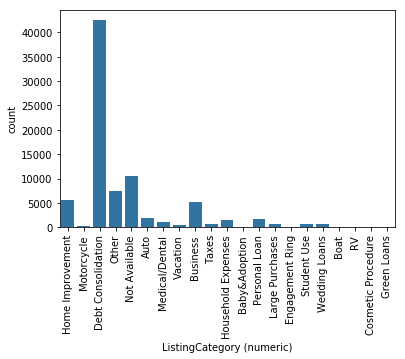

In [273]:
base_color = sb.color_palette()[0]
ListingCategory = df['ListingCategory (numeric)'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory (numeric)', color = base_color)
plt.xticks(rotation = 90)

> By far, the most common loan type is the debt consolidation loan. It would be interesting to see the correlation between loan categorie and loan amount.

### What is the highest, lowest and the average risk scores

In [274]:
df.describe()

,Term,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
count,81115.000000,81115.000000,61586.000000,81115.000000,81114.000000,75977.000000,8.111500e+04,81115.000000
mean,40.929594,0.191218,6.037720,687.528324,706.536800,0.262449,5.970960e+03,8612.301633
std,10.568458,0.075064,2.388946,64.839848,64.795293,0.461642,7.858231e+03,6377.056491
min,12.000000,0.000000,1.000000,0.000000,19.000000,0.000000,0.000000e+00,1000.000000
25%,36.000000,0.131400,4.000000,660.000000,679.000000,0.140000,3.416667e+03,4000.000000
50%,36.000000,0.181400,6.000000,680.000000,699.000000,0.220000,5.000000e+03,7000.000000
75%,36.000000,0.249900,8.000000,720.000000,739.000000,0.310000,7.166667e+03,12500.000000
max,60.000000,0.360000,11.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.000000


> The highest risk score is 11 and the lowest score is 1 (out of 10). The average risk score is about 6. It would be interesting to see if there is a correlation between risk score and monthly income.

## Which state has the highest borrowing rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

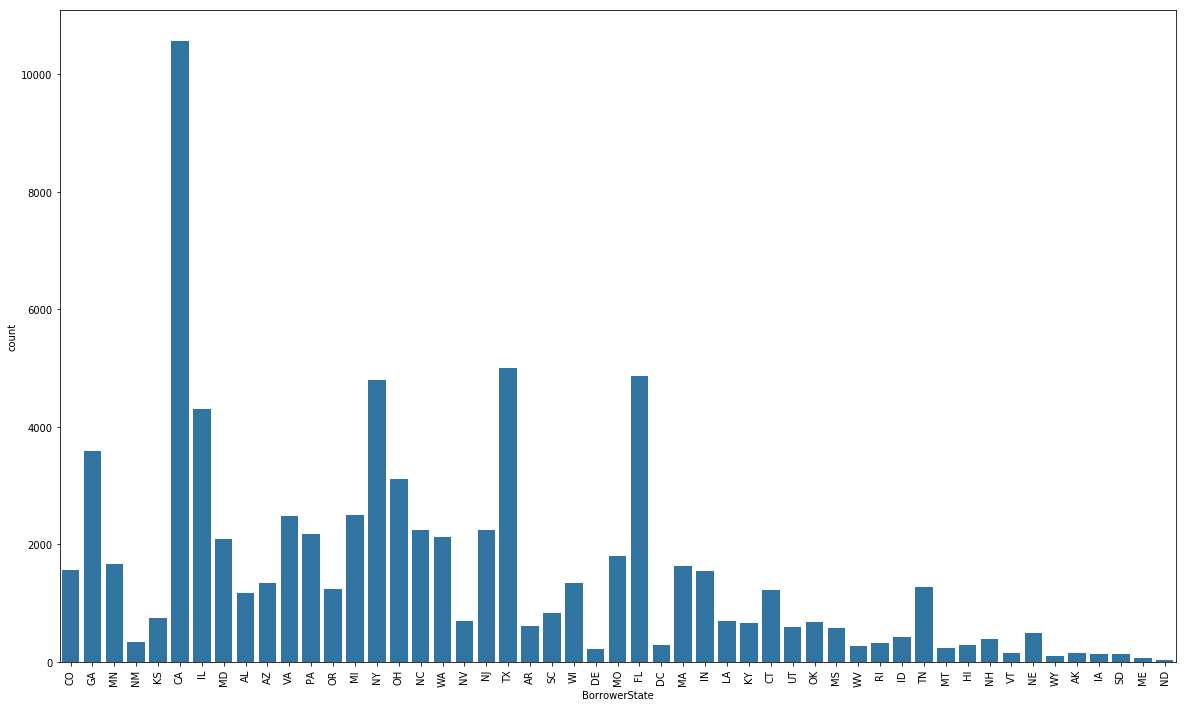

In [275]:
plt.figure(figsize=(20,12))
base_color = sb.color_palette()[0]
ListingCategory = df['BorrowerState'].value_counts().index
sb.countplot(data = df, x = 'BorrowerState', color = base_color)
plt.xticks(rotation = 90)

> The most popular borrower state is California which is not surprising beings they have a high population. It is not surprising that the other states are higher. Many of the top borrowing states have high population. It would be worth looking at each state versus population.

### Difference between occupation and how much they borrowed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text xticklabel objects>)

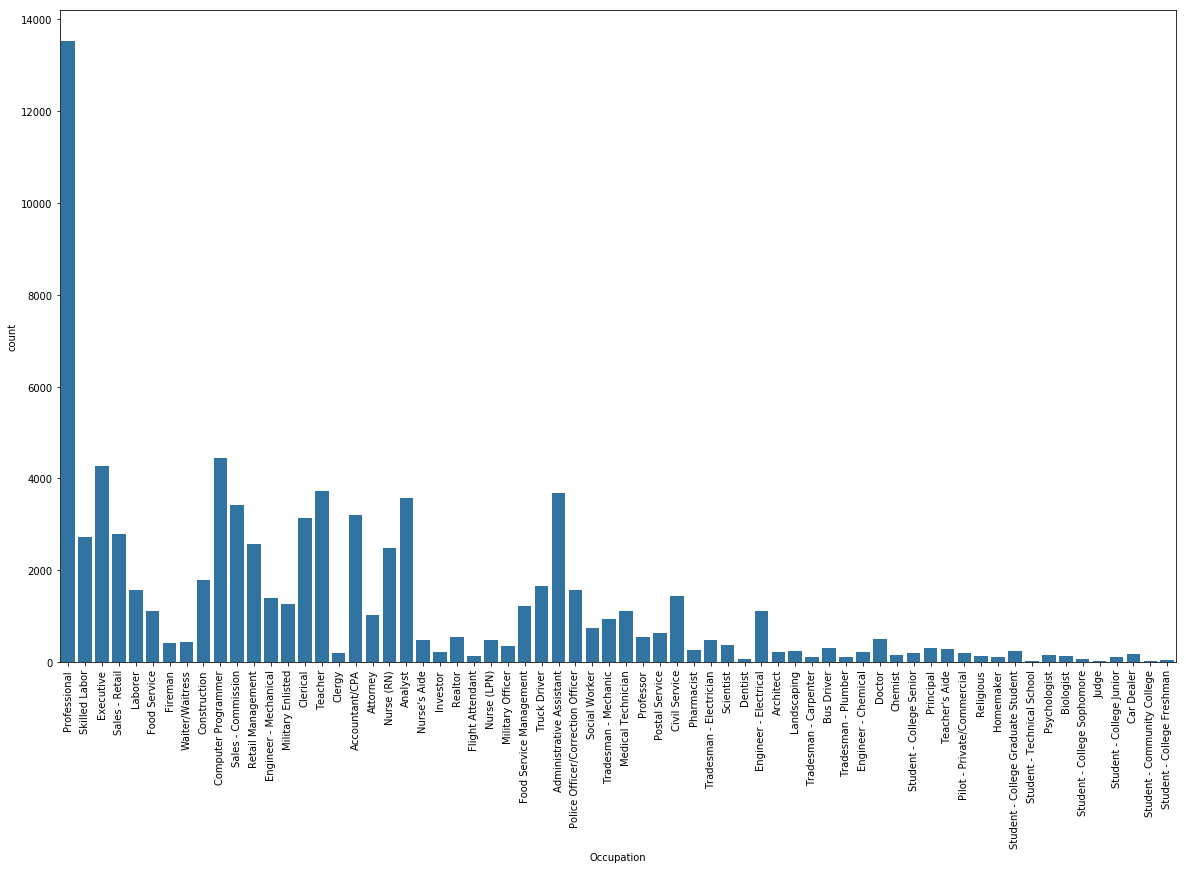

In [276]:
plt.figure(figsize=(20,12))
base_color = sb.color_palette()[0]
ListingCategory = df['Occupation'].value_counts().index
sb.countplot(data = df, x = 'Occupation', color = base_color)
plt.xticks(rotation = 90)

> The most common occupation for borrowers is "Professional". Since this is so vague, I would like to remove this term and look more into the correlation between occupation and loan amount.

In [277]:
df_occupation = df[(df['Occupation'] == 'Professional')].index
df.drop(df_occupation , inplace=True)
df['Occupation'].value_counts()

Computer Programmer                   4442
Executive                             4280
Teacher                               3729
Administrative Assistant              3677
Analyst                               3578
Sales - Commission                    3414
Accountant/CPA                        3209
Clerical                              3135
Sales - Retail                        2780
Skilled Labor                         2723
Retail Management                     2579
Nurse (RN)                            2475
Construction                          1777
Truck Driver                          1666
Laborer                               1578
Police Officer/Correction Officer     1561
Civil Service                         1445
Engineer - Mechanical                 1397
Military Enlisted                     1265
Food Service Management               1227
Engineer - Electrical                 1118
Food Service                          1115
Medical Technician                    1105
Attorney   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

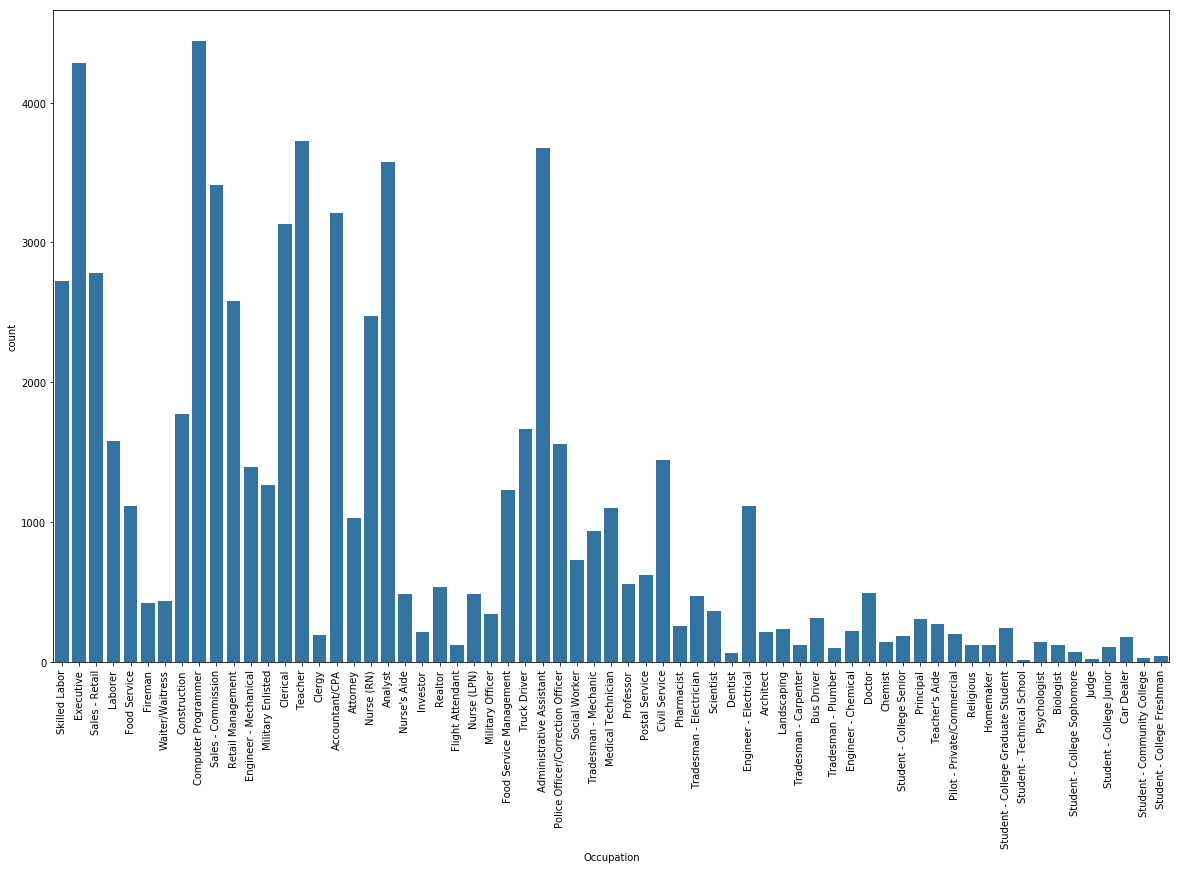

In [278]:
plt.figure(figsize=(20,12))
base_color = sb.color_palette()[0]
ListingCategory = df['Occupation'].value_counts().index
sb.countplot(data = df, x = 'Occupation', color = base_color)
plt.xticks(rotation = 90)

> In this graph, computer programmers, executives, teachers and administrative assistants borrow the most frequently.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were a few changes that needed to be made throughout the exploring process. Personally, I find it easier to complete these cleaning tasks (besides the major ones) as I go. Cleaning steps 3 through 5 were completed after the analysis began.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were a few instances where I believed that the data would've been more defined if values were removed. In the 'difference between occupation and how much they borrowed' portion of the assessment, I found that the occupation "Professional" was wildly used. Beings this isn't specific, I believe it would be best to remove so you can clearly see which occupations were the most popular.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in your
data.

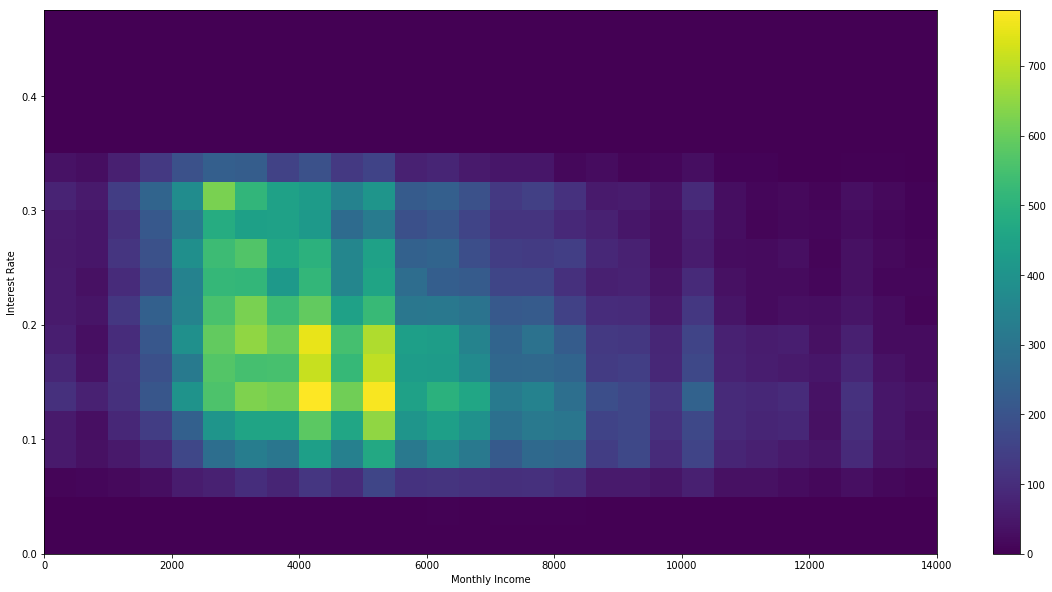

In [279]:
plt.figure(figsize = [20, 10])

bins_x = np.arange(0, 14000.5+1, 500)
bins_y = np.arange(0, 0.4+.1, .025)

plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'BorrowerRate', bins = [bins_x, bins_y])
plt.xlabel('Monthly Income')
plt.ylabel('Interest Rate')
plt.colorbar();

> The graph shows that the majority of borrowers make between 4,000 and 4,500 dollars monthly and have an interest rate between 15 and 20 percent. The majority of borrowers make between 2,500 and 5,000 dollars monthly.

### Correlation between monthly income and prosper score

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


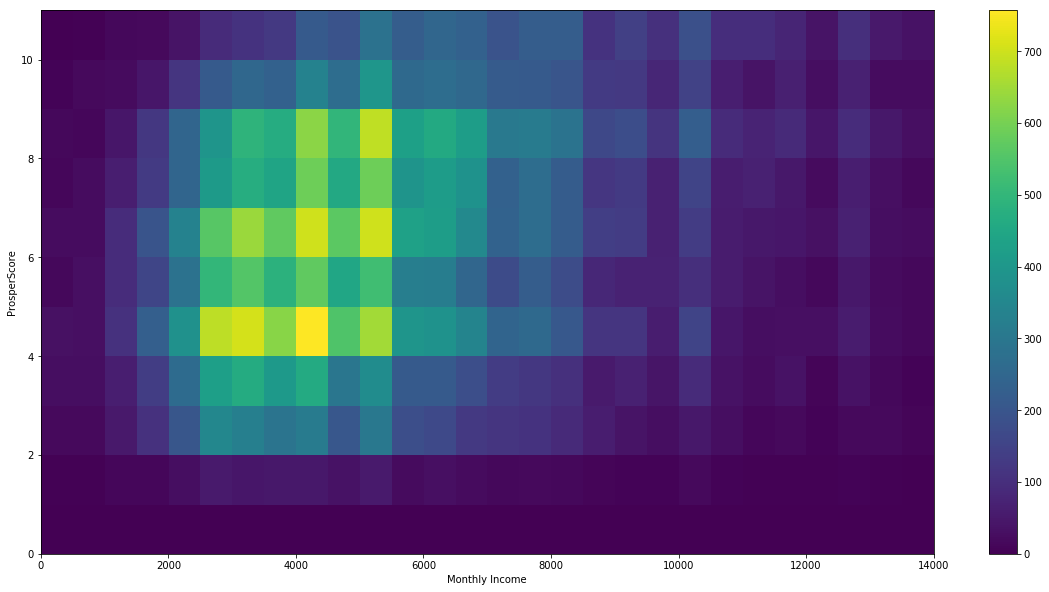

In [280]:
plt.figure(figsize = [20, 10])

bins_x = np.arange(0, 14000.5+1, 500)
bins_y = np.arange(0, 11.0+.1, 1)

plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'ProsperScore', bins = [bins_x, bins_y])
plt.xlabel('Monthly Income')
plt.ylabel('ProsperScore')
plt.colorbar();

> There is not a huge correlation between monthly income and prosper score. There is quite a bit of yellow between 3,000 dollars monthly income and 5,500 dollars monthly income and the prosper score ranges from 4 to 9. 

> This graph shows that the majority of people have credit scores between 700 and 725. Those credit scores have interest rates between 10 and 15 percent.

### Correlation between occupation and how much they borrowed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

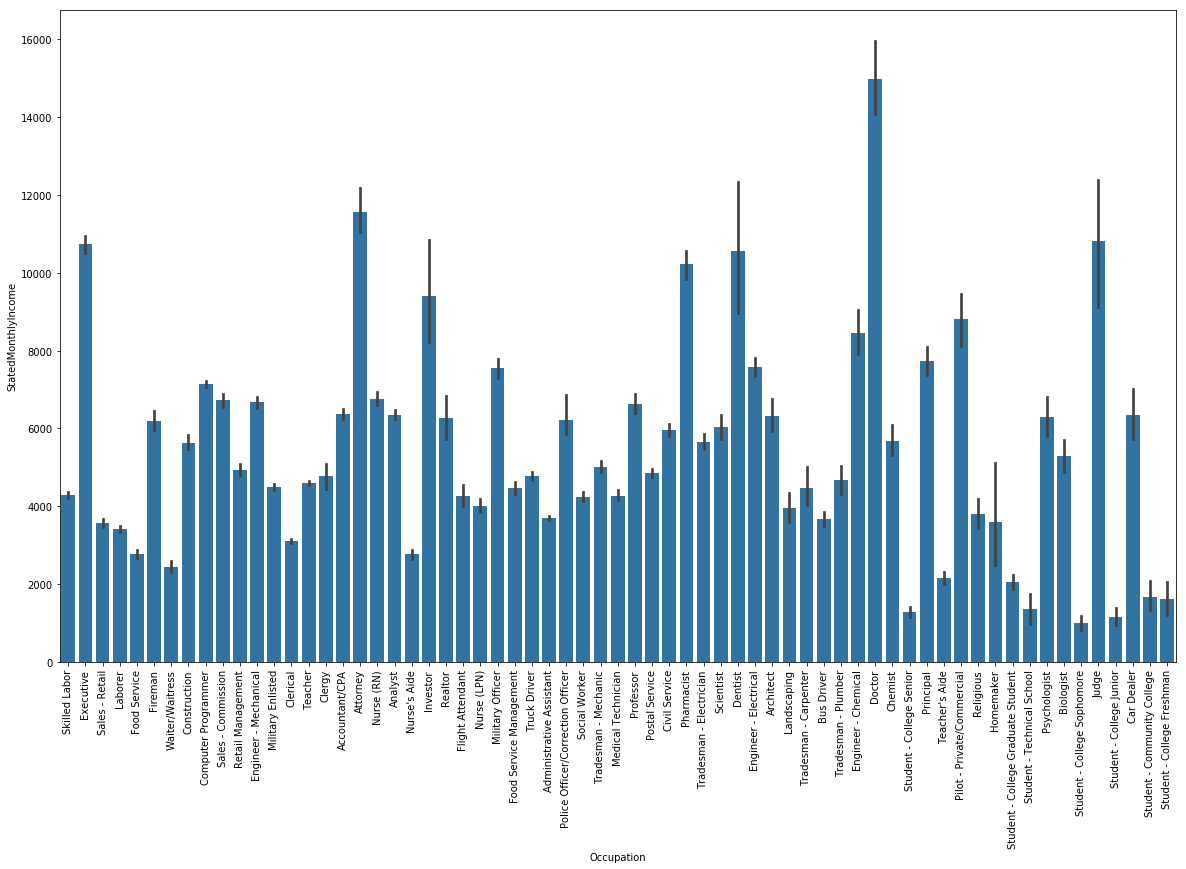

In [281]:
plt.figure(figsize=(20,12))

base_color = sb.color_palette()[0]

ax = sb.barplot(data = df, x = 'Occupation', y = 'StatedMonthlyIncome', color = base_color)
ax.legend(loc = 20, ncol = 3, framealpha = 1, title = 'cat_var2')

plt.xticks(rotation = 90)

> According to the graph, doctors, attorneys, dentists, judges and executives borrow the most amount of money.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text xticklabel objects>)

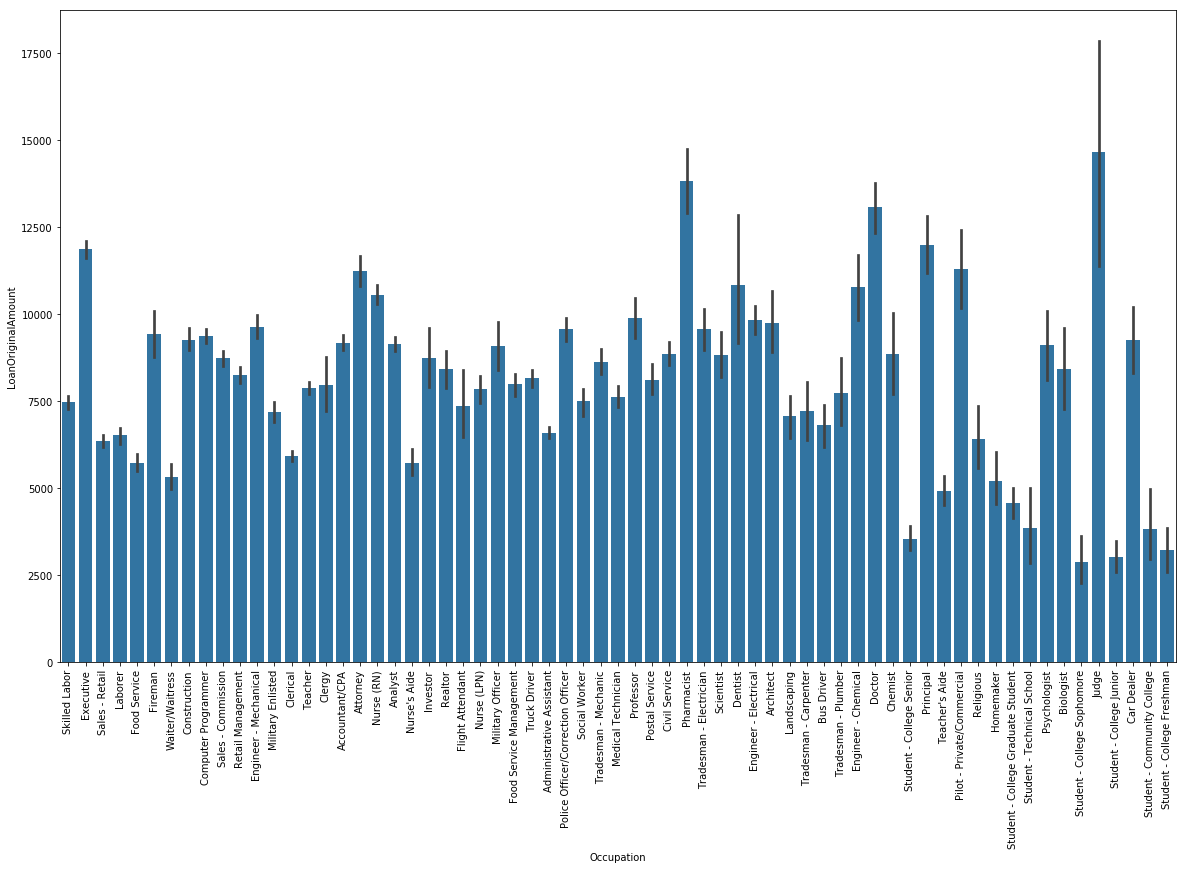

In [282]:
plt.figure(figsize=(20,12))

base_color = sb.color_palette()[0]

ax = sb.barplot(data = df, x = 'Occupation', y = 'LoanOriginalAmount', color = base_color)
ax.legend(loc = 20, ncol = 3, framealpha = 1, title = 'cat_var2')

plt.xticks(rotation = 90)



> Judges, pharmacists, doctors and executives make the most amount of money. Whereas, judges, pharmacists, doctors, executives, and pilots borrow the most amount of money. It makes sense, if you have a lot of money, you have more money to borrow.

### The correlation between interest rate and credit score

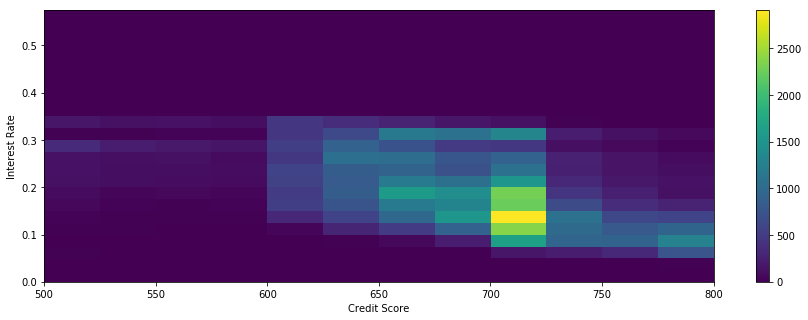

In [283]:
plt.figure(figsize = [15, 5])

bins_x = np.arange(500, 800.5+1, 25)
bins_y = np.arange(0, 0.5+.1, .025)

plt.hist2d(data = df, x = 'CreditScoreRangeLower', y = 'BorrowerRate', bins = [bins_x, bins_y])
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.colorbar();

> This graph shows that the majority of borrowers had a credit score of between 700 and 725 and their interest rates fell around 15%.

### Loan status versus loan amount

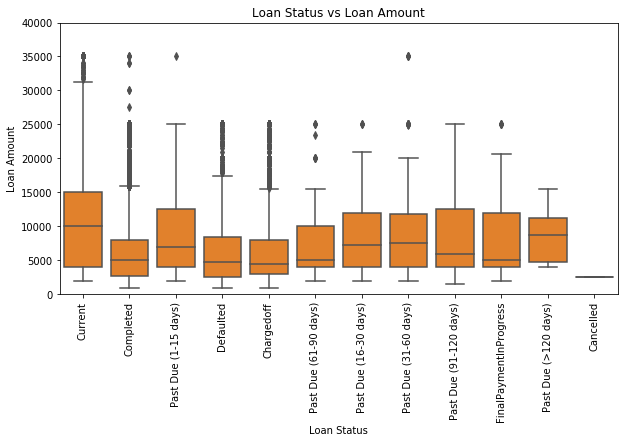

In [284]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.ylim([0, 40000])
plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation = 90)
plt.show()

> Loans that are in the 10,000 dollar range are more likely to be current, whereas, seriously past due loans (91-120 days) are about 5,000. Many loans that have defaulted are lower loan amounts (on average, about 5,000 dollars).

### Loan Status versus credit score

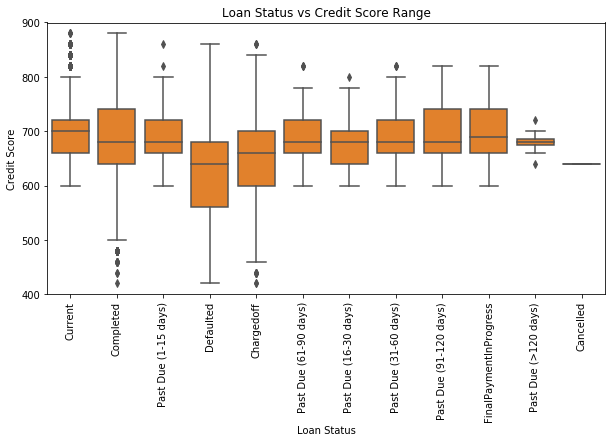

In [285]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'LoanStatus', y = 'CreditScoreRangeLower', color = base_color)
plt.ylim([400, 900])
plt.title('Loan Status vs Credit Score Range')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.xticks(rotation = 90)
plt.show()

> This graph shows that people with 700 and higher credit scores are much more likely to pay for their loan. This graph also shows that if people have a 650 credit score or lower, they are more likely to default on their loan.

### Loan category and the amount of the loan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

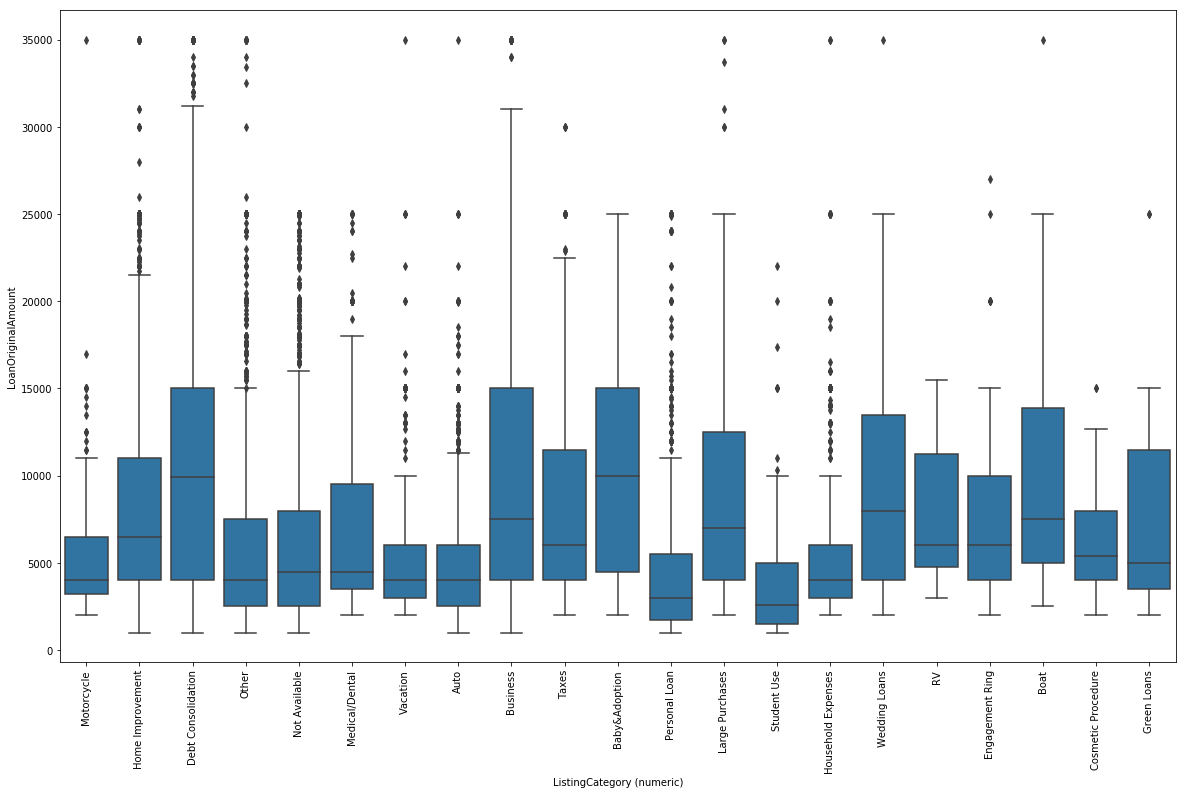

In [286]:
plt.figure(figsize=(20,12))
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'ListingCategory (numeric)', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 90)

> This graph shows that people that are borrowing for baby & adoption tend to borrow much more than other categories. Debt consolidation is the most popular loan and they are second highest borrower. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a strong correlation between interest rate and credit score is high. Most of borrowers fall into a particular interest rate and credit score. Secondly, there is an interesting correlation between occupation and many different factors including how much their monthly income is, the loan amount, etc. The relationship between income, occupation and loan amount was not shocking; the more money someone made, the more they spent. The correlation between interest rate and credit score was the most interesting relationship that I found.

> One of the graph shows that the majority of borrowers make between 4,000 and 4,500 dollars monthly and have an interest rate between 15 and 20 percent. The majority of borrowers make between 2,500 and 5,000 dollars monthly.

> Another graph shows that people with 700 and higher credit scores are much more likely to pay for their loan. This graph also shows that if people have a 650 credit score or lower, they are more likely to default on their loan.

> By far, the most common loan type is the debt consolidation loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I found some interesting data while exploring how many people work at a certain occupation got loans and also the relationship between occupation and loan amount.

> Judges, pharmacists, doctors and executives borrow the most amount of money. Whereas, computer programmers, executives, teachers and administrative assistants borrow more frequently

## Multivariate Exploration


### Borrowing Rate versus Monthly Income versus Credit Grade

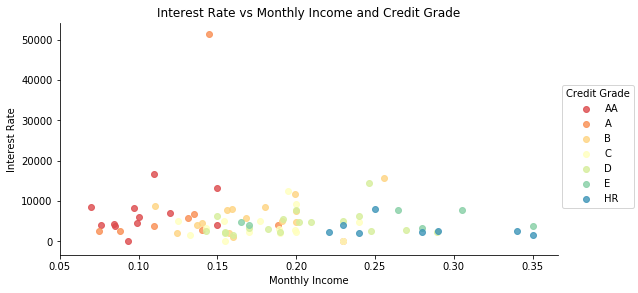

In [287]:

g = sb.FacetGrid(data = df_random, hue = "CreditGrade", hue_order = ['AA', 'A', 'B', 'C', 'D', 'E','HR'], size = 4, aspect = 2, palette="Spectral")
g.map(sb.regplot,"BorrowerRate", "StatedMonthlyIncome", fit_reg = False);

new_title = 'Credit Grade'
g.add_legend(title = 'Credit Grade')
plt.ylabel('Interest Rate')
plt.xlabel('Monthly Income')
plt.title("Interest Rate vs Monthly Income and Credit Grade");


> According to the graph, borrowers that had an 'AA' credit score, also had low interest rates and their income ranged anywhere from about 16,000 dollars a month to 0 dollars per month. As you can see, the interest rate and the credit score are directly related and you can see that as the credit interest rate gets higher, the monthly income comes down.

## Interest Rate vs Loan Status based on Term

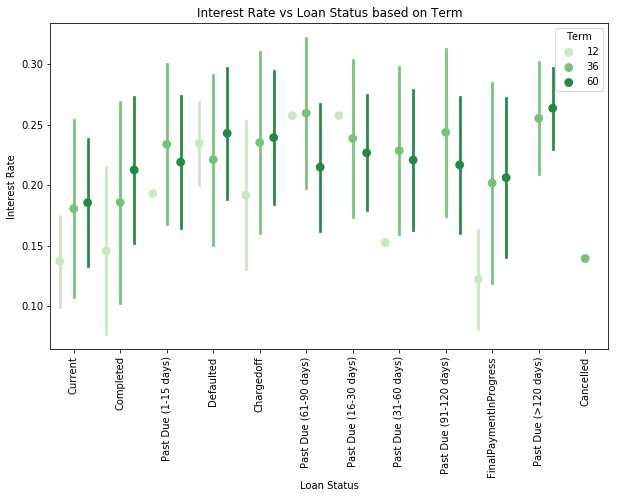

In [288]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = .6, ci='sd')
plt.title('Interest Rate vs Loan Status based on Term')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.xticks(rotation = 90)
ax.set_yticklabels([],minor = True);

> This graph shows that current loans that have a shorter term has less of an interest rate. This is the same for completed. Surprisingly, the past due loan status' typically have higher interest rates. This would make sense - based on my analysis, people that have bad credit scores are at high risk (not paying back their loan). If someone has a high interest rate, they most likely have a bad credit score and thus higher interest rates. 

### Loan Amount versus Interest Rate and Loan Term

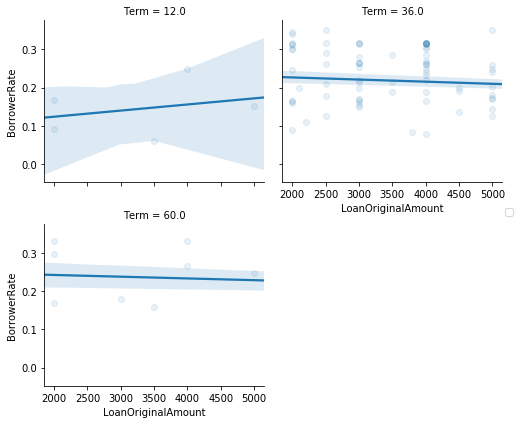

In [290]:
g=sb.FacetGrid(data=df_random2, aspect=1.2, col='Term', col_wrap=2)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> In a 12 month term, it appears that there is a slight increase in interest rate the more the loan is. In a 36 month term, there is a slight (barely noticable) decline in interest rate the more money that was borrowed.

## Loan Amount versus Monthly Income and Term

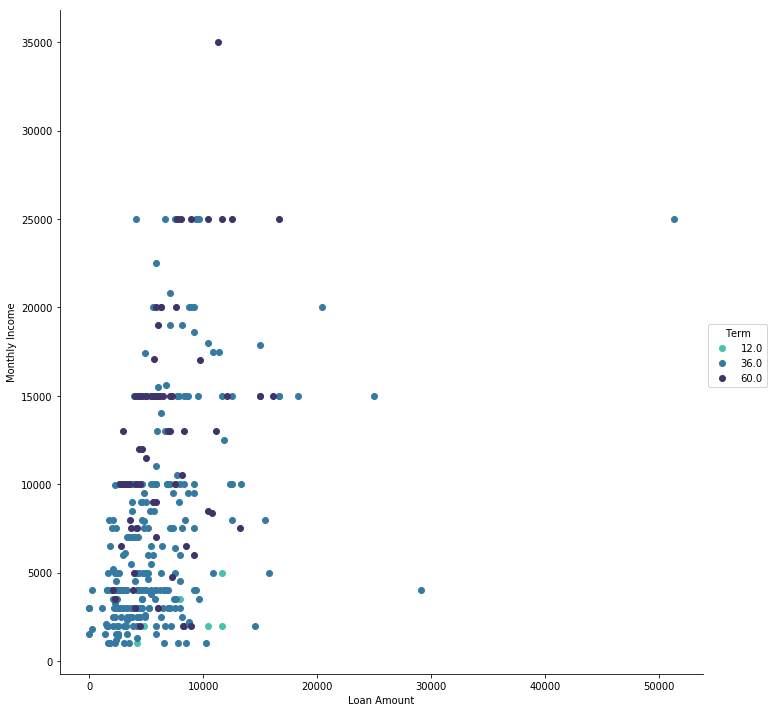

In [291]:
g = sb.FacetGrid(data = df_random, hue = 'Term', size = 10,
                 palette = 'mako_r')
g.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount')
plt.ylabel('Monthly Income')
plt.xlabel('Loan Amount')
g.add_legend()


> This graph shows that the majority of people making betweeen 1,000 and 10,000 a month that also borrowed between 0 to 8,000 dollars typically have a 36 month loan. It is interesting looking at the 60 month loan because they are typically always either (about) make around 4,000, 1,000 and 15,000 dollars a month. It appears to be lines in the graph right where those income ranges are. Many of the 60 month loans are less than 10,000 dollars. Most of the loans are 12 months. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Current loans that have a shorter term has less of an interest rate. This is the same for completed. Surprisingly, the past due loan status' typically have higher interest rates. This would make sense - based on my analysis, people that have bad credit scores are at high risk (not paying back their loan). If someone has a high interest rate, they most likely have a bad credit score and thus higher interest rates. 

> Borrowers that had an 'AA' credit score, also had low interest rates and their income ranged anywhere from about 16,000 dollars a month to 0 dollars per month. As you can see, the interest rate and the credit score are directly related and you can see that as the credit interest rate gets higher, the monthly income comes down.

> In a 12 month term, it appears that there is a slight increase in interest rate the more the loan is. In a 36 month term, there is a slight (barely noticable) decline in interest rate the more money that was borrowed.

> The majority of people making betweeen 1,000 and 10,000 a month that also borrowed between 0 to 8,000 dollars typically have a 36 month loan. It is interesting looking at the 60 month loan because they are typically always either (about) make around 4,000, 1,000 and 15,000 dollars a month. It appears to be lines in the graph right where those income ranges are. Many of the 60 month loans are less than 10,000 dollars. Most of the loans are 12 months. 


### Were there any interesting or surprising interactions between features?

> The most surprising interaction in this dataset is the correlation between borrowing rate versus monthly income versus credit grade because of how clear the graph shows that monthly income, interest rate and the credit grade are directly linked and it shows perfectly on the map.